In [1]:
import os
import mediapipe as mp
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import string, os 
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, Flatten, Dense, Reshape, BatchNormalization, UpSampling2D, concatenate, MaxPooling2D,Add,Embedding,Concatenate,Dropout,multiply,InputLayer,Conv2DTranspose,GlobalMaxPooling2D,RandomRotation,RandomZoom,LSTM
from tensorflow.keras.applications import ResNet50V2,MobileNetV2,MobileNet,InceptionV3,VGG16

In [2]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.9)

In [3]:
from pathlib import Path

def count_files_in_subfolders(parent_folder_path):

    parent_folder = Path(parent_folder_path)

    subfolders = [f for f in parent_folder.iterdir() if f.is_dir()]

    for subfolder in subfolders:

        file_count = len(list(subfolder.rglob("*.jpg"))) + \
                     len(list(subfolder.rglob("*.png"))) + \
                     len(list(subfolder.rglob("*.jpeg")))

        print(f"Folder '{subfolder}': {file_count} files")


image_dir = 'D:/ML_Project/data'

count_files_in_subfolders(image_dir)

Folder 'D:\ML_Project\data\A': 500 files
Folder 'D:\ML_Project\data\B': 500 files
Folder 'D:\ML_Project\data\C': 500 files
Folder 'D:\ML_Project\data\D': 500 files
Folder 'D:\ML_Project\data\Delete': 500 files
Folder 'D:\ML_Project\data\E': 500 files
Folder 'D:\ML_Project\data\F': 500 files
Folder 'D:\ML_Project\data\G': 500 files
Folder 'D:\ML_Project\data\H': 500 files
Folder 'D:\ML_Project\data\I': 500 files
Folder 'D:\ML_Project\data\J': 500 files
Folder 'D:\ML_Project\data\K': 500 files
Folder 'D:\ML_Project\data\L': 500 files
Folder 'D:\ML_Project\data\M': 500 files
Folder 'D:\ML_Project\data\N': 500 files
Folder 'D:\ML_Project\data\O': 500 files
Folder 'D:\ML_Project\data\P': 500 files
Folder 'D:\ML_Project\data\Q': 500 files
Folder 'D:\ML_Project\data\R': 500 files
Folder 'D:\ML_Project\data\S': 500 files
Folder 'D:\ML_Project\data\Space': 500 files
Folder 'D:\ML_Project\data\T': 500 files
Folder 'D:\ML_Project\data\U': 500 files
Folder 'D:\ML_Project\data\V': 500 files
Folder 

In [4]:
from pathlib import Path
from PIL import Image
SIZE = 128

def get_dataset(dataset):
    X = []
    y = []

    image_dir = Path(dataset)

    filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpeg')) + list(image_dir.glob(r'**/*.png'))

    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
    for file in filepaths[:]:
        img = Image.open(file).resize((SIZE,SIZE))
        img_rgb = img.convert('RGB')
        img = np.asarray(img_rgb) / 255.0

        X.append(img)

    for label in labels[:]:
        y.append(label)

    return X,y
X, y = get_dataset(image_dir)


C:\Users\Admin\AppData\Local\Temp\ipykernel_24632\2713381835.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


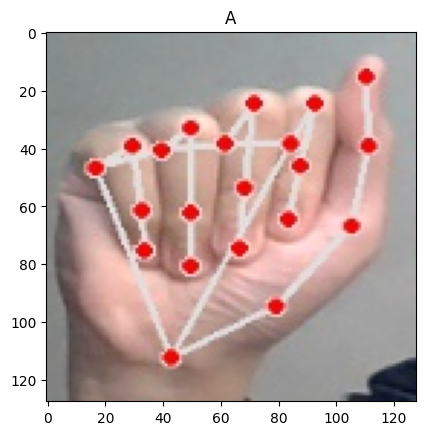

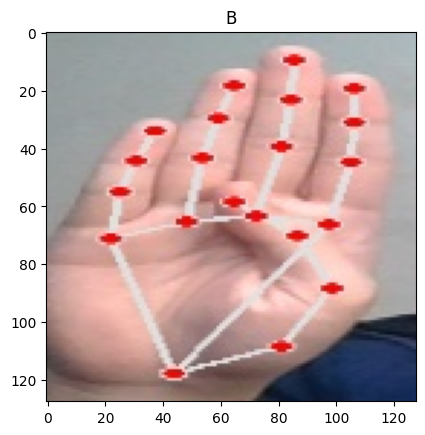

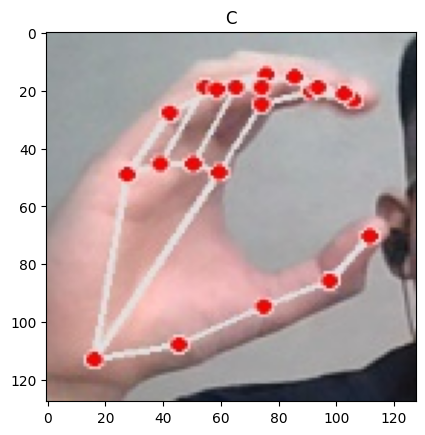

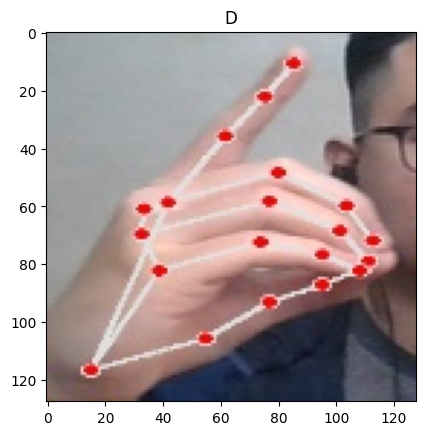

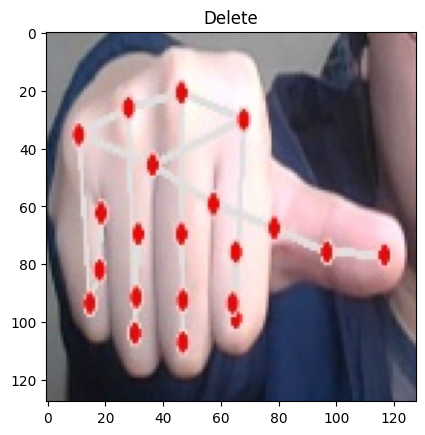

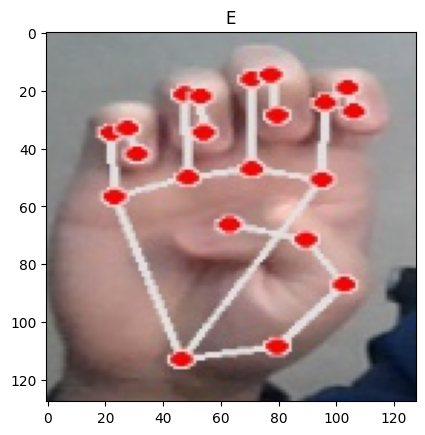

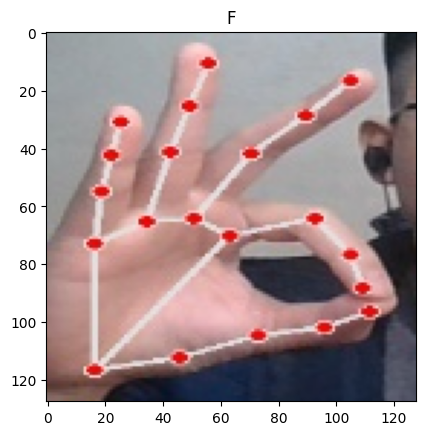

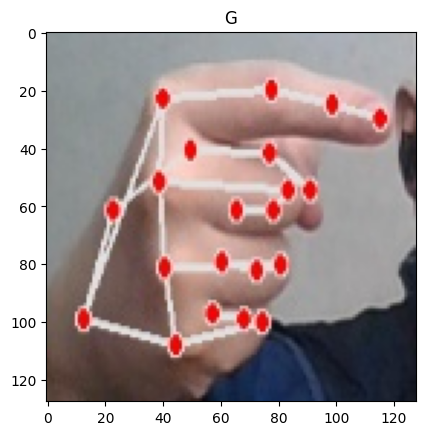

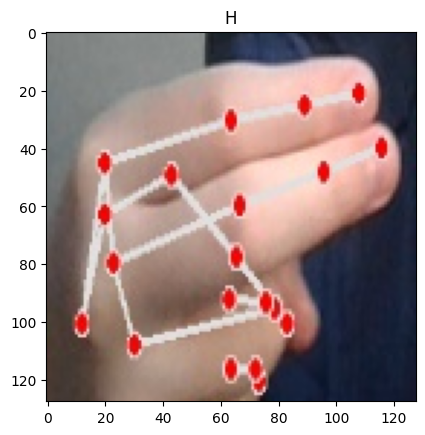

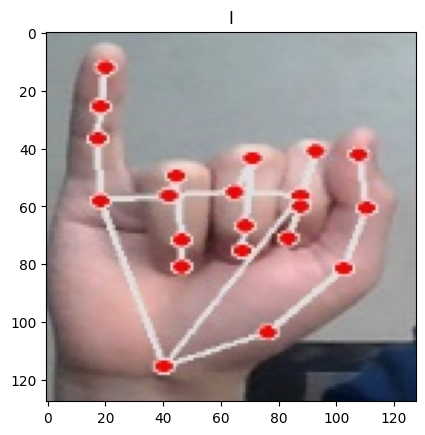

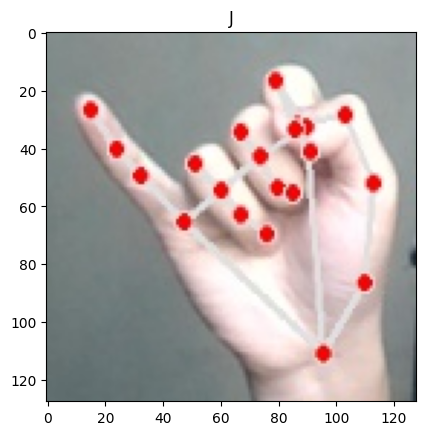

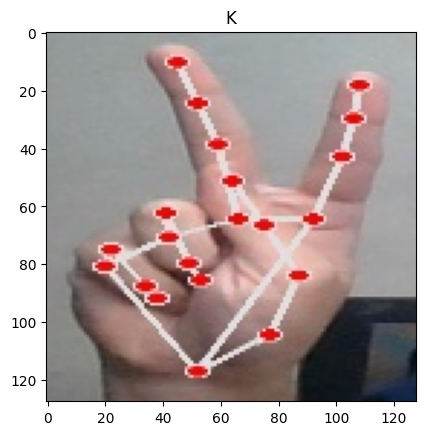

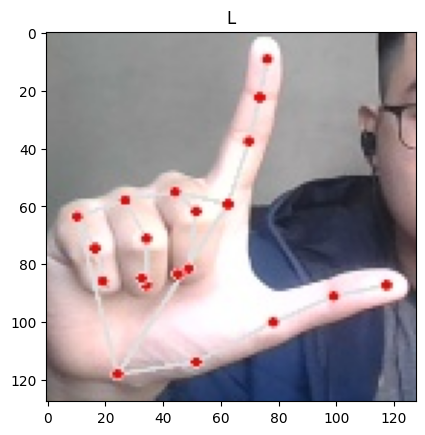

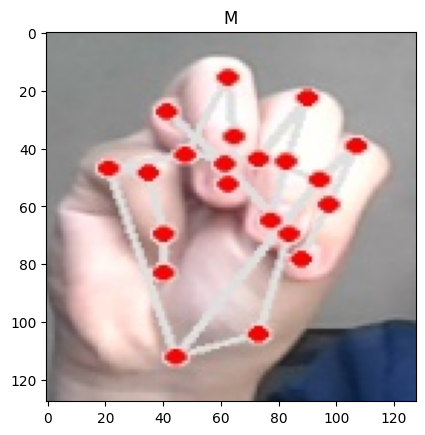

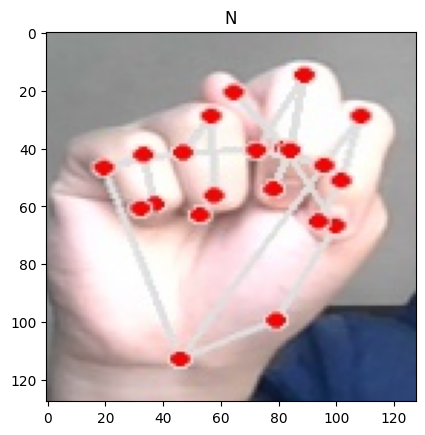

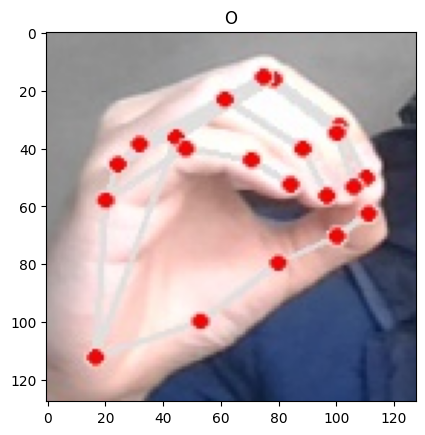

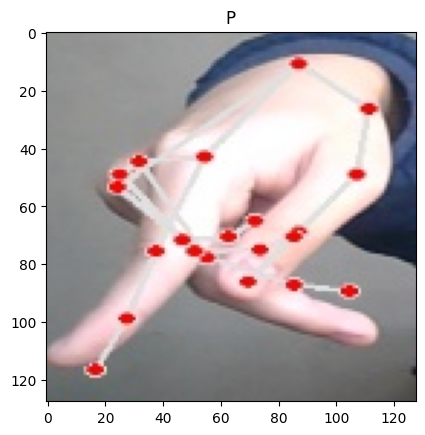

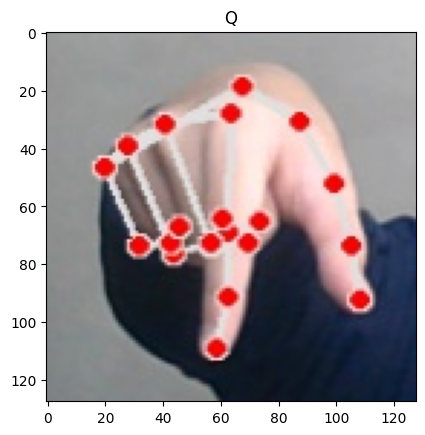

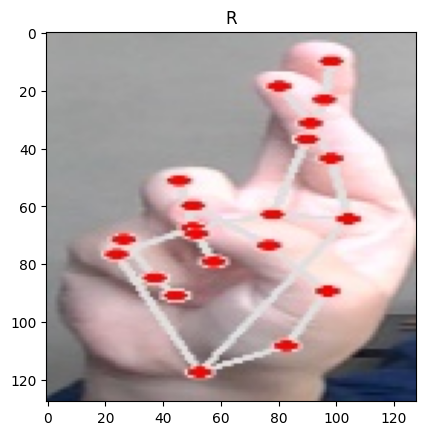

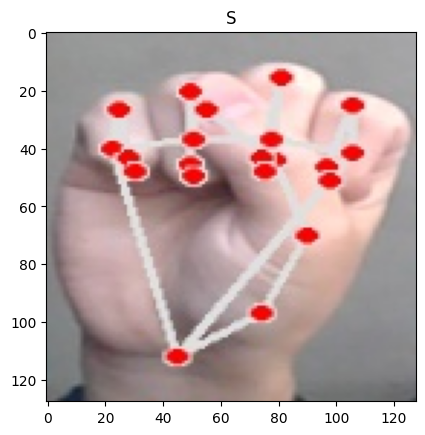

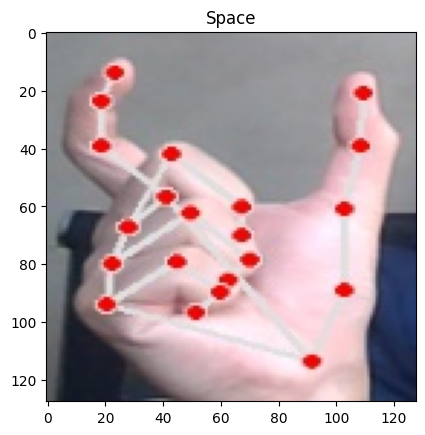

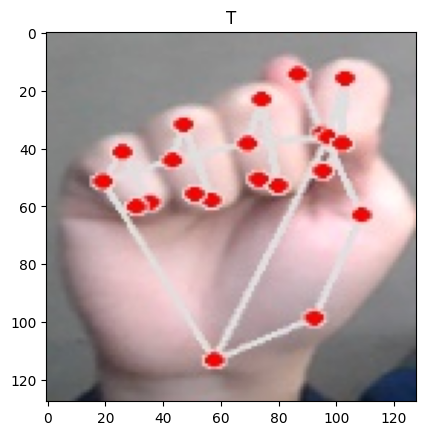

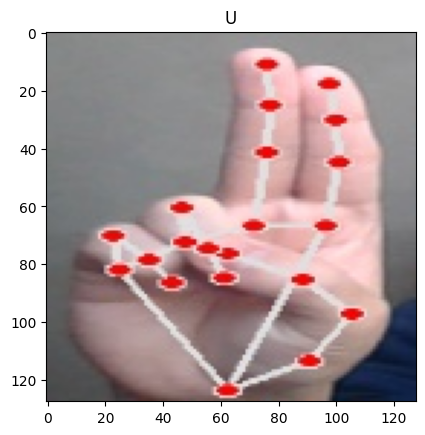

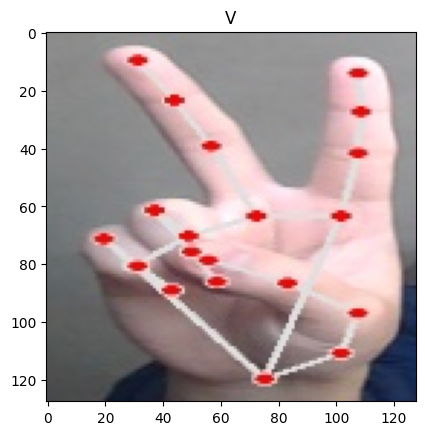

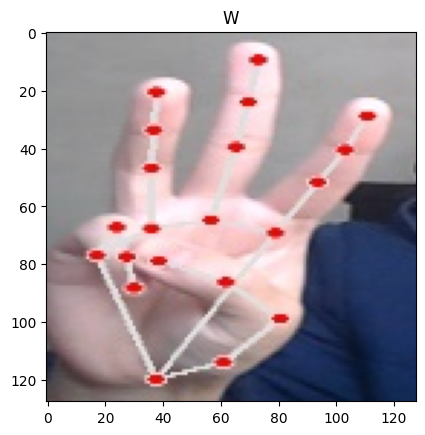

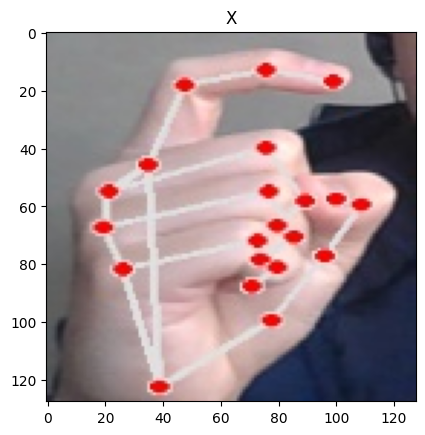

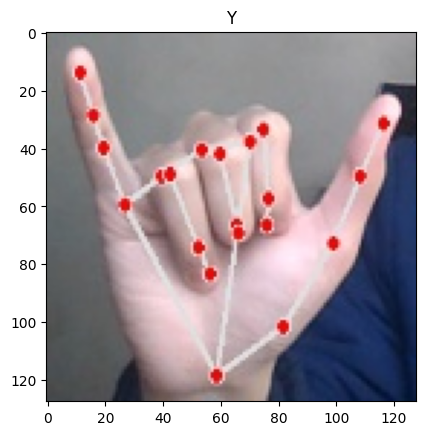

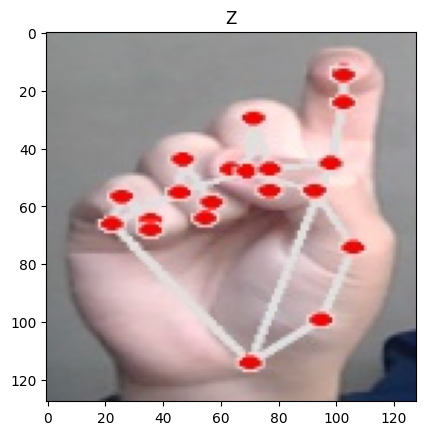

In [6]:
def show_images(image_dir):
    for i in sorted(os.listdir(image_dir)):
        if i == '.DS_Store':
            pass
        else:
            for j in os.listdir(os.path.join(image_dir,i))[0:1]:
                img = cv2.imread(os.path.join(image_dir,i,j))
                img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

                results = hands.process(img_rgb)
                if results.multi_hand_landmarks:
                    for hand_landmarks in results.multi_hand_landmarks:
                        mp_drawing.draw_landmarks(
                            img_rgb, 
                            hand_landmarks,
                            mp_hands.HAND_CONNECTIONS,
                            mp_drawing_styles.get_default_hand_landmarks_style(),
                            mp_drawing_styles.get_default_hand_connections_style()

                        )

                plt.figure()
                plt.title(i)
                plt.imshow(img_rgb)
    plt.show()
show_images(image_dir)

In [7]:
mpPose = mp.solutions.pose
pose = mpPose.Pose(
    static_image_mode=True,
    min_detection_confidence=0.3,
    model_complexity=2
)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.3, random_state=22, shuffle=True)

In [9]:
X_train.shape

(9800, 128, 128, 3)

In [12]:
y_train.shape

(3500,)

In [10]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [11]:
encoder = LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

y_train = to_categorical(y_train, len(encoder.classes_))
y_test = to_categorical(y_test, len(encoder.classes_))

In [12]:
labels = encoder.classes_
num_classes = len(labels)

In [13]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (9800, 128, 128, 3)
Shape of y_train: (9800, 28)


In [ ]:
pretrained_model_1 = VGG16(weights = 'imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))


base_model = pretrained_model_1

x = base_model.output
x = Flatten()(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
model.compile(loss='categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])
model.summary()

model.fit(X_train,y_train, epochs=10, validation_data=(X_test, y_test))

In [15]:
model.save('model_check.keras')


In [ ]:
def predict_sign(path):
    img = Image.open(path).resize((SIZE,SIZE))
    img_rgb = img.convert('RGB')
    img = np.asarray(img_rgb) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    predicted = labels[np.argmax(prediction)]
    return predicted

path = 'D:/ML_Project/data/A/hand_100.jpg'
predict_sign(path)